In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 40
nt = 40
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

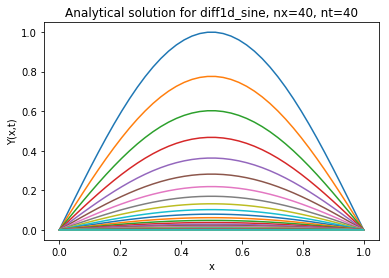

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
#plt.legend(loc='right')
plt.title('Analytical solution for %s, nx=%d, nt=%d' % (eq_name, nx, nt));

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

         Current function value: 0.099849
         Iterations: 2803
         Function evaluations: 3017
         Gradient evaluations: 3005
1h 32min 55s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 0.0998488447241619
 hess_inv: array([[ 4.09542388e-01,  3.21742556e-01,  4.71688588e-01, ...,
         1.36390010e+00, -3.17288937e+02, -1.77310528e+02],
       [ 3.06272799e-01,  1.92411633e+00,  1.21799835e+00, ...,
         3.41657136e+00, -1.47060657e+02, -8.27758400e+01],
       [ 4.51475483e-01,  1.22063245e+00,  4.26930038e+00, ...,
         4.58323286e+00, -1.42088235e+02, -8.65628540e+01],
       ...,
       [ 1.39741210e+00,  3.35127756e+00,  4.48320964e+00, ...,
         1.18198778e+02,  3.32707017e+03,  1.83297492e+03],
       [-3.22777278e+02, -2.02897977e+02, -2.15070796e+02, ...,
         3.48222716e+03,  1.39188073e+06,  7.66174026e+05],
       [-1.80298369e+02, -1.13509934e+02, -1.26735998e+02, ...,
         1.91816127e+03,  7.66053905e+05,  4.21722403

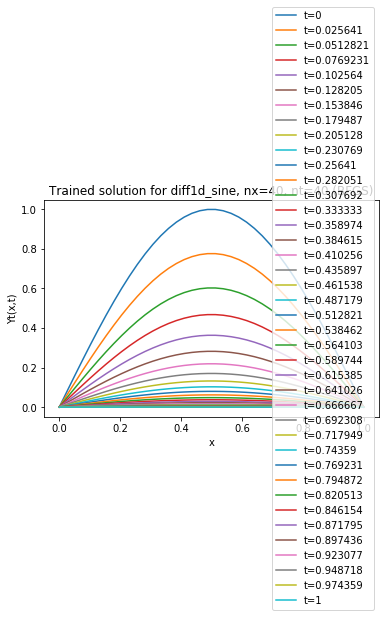

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

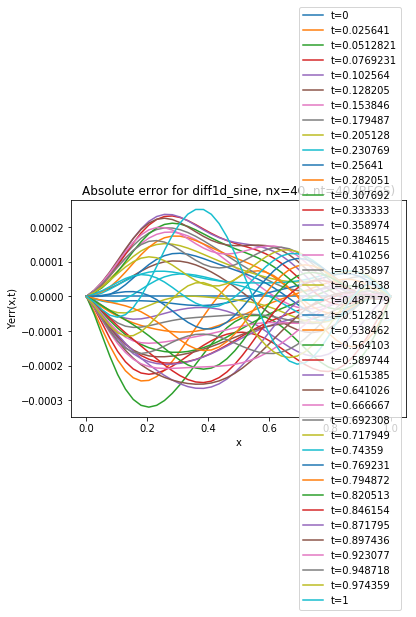

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));